<a href="https://colab.research.google.com/github/riznagauri/Credit_Card_Customer_Segmentation/blob/main/CC_Lean_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading data from train, test and submission csv files
train = pd.read_csv('/content/train_data.csv')
test = pd.read_csv('/content/test_data.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [5]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


We have:
4 int64 features including the target variable
7 object features including the not required  ID variable.

Missing values found only in Credit_Product variable.

In [7]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


We find that average of the customers is around 43 years, and on an avg customers associated with the banks are around 47 months

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [9]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [10]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [11]:
# Categorical features excluding the ID variable
cat_cloumns = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [12]:
# Function for getting description of Categorical features
def cat_description(data,cat_columns,dataof):
  print('{} Data:\n'.format(dataof))
  for i in range(len(cat_cloumns)):
    col = cat_cloumns[i]
    print('Description for {}:\n{}\n'.format(col,pd.Series(data[col]).describe()))
    print('Value Counts:\n{}\n'.format(data[col].value_counts()))
    print('No of Missing values present: {}\n--------------------\n'.format(data[col].isna().sum()))
    

In [13]:
# Description for Categorical features in Train dataset
cat_description(train,cat_cloumns,'Train')

Train Data:

Description for Gender:
count     245725
unique         2
top         Male
freq      134197
Name: Gender, dtype: object

Value Counts:
Male      134197
Female    111528
Name: Gender, dtype: int64

No of Missing values present: 0
--------------------

Description for Region_Code:
count     245725
unique        35
top        RG268
freq       35934
Name: Region_Code, dtype: object

Value Counts:
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

No of Missing values present: 0
-

In [14]:
cat_cloumns[:-1]

['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product']

In [15]:
# Description for Categorical features in Test dataset
cat_description(test,cat_cloumns[:-1],"Test")


Test Data:

Description for Gender:
count     105312
unique         2
top         Male
freq       57705
Name: Gender, dtype: object

Value Counts:
Male      57705
Female    47607
Name: Gender, dtype: int64

No of Missing values present: 0
--------------------

Description for Region_Code:
count     105312
unique        35
top        RG268
freq       15125
Name: Region_Code, dtype: object

Value Counts:
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

No of Missing values present: 0
----

In [16]:
# Removing Duplicates
duplicate = train[train.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active, Is_Lead]
Index: []


In [17]:
test_duplicate = test[test.duplicated()]
print("Duplicate Rows :",test_duplicate)

Duplicate Rows : Empty DataFrame
Columns: [ID, Gender, Age, Region_Code, Occupation, Channel_Code, Vintage, Credit_Product, Avg_Account_Balance, Is_Active]
Index: []


No Duplicates found.

**Missing Values Immutation:** 
Credit_Product (Missing values present: 29325) 
It means 'If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)'. Since, banking industry is has one of the most sofisticated data collection methods and is seen below ONLY 20 customers are having Null values.
So we can assume that Null occurance means that the customer has No Credit Product with the bank.
Hence, all Null values will be immputed as No.


In [18]:
train['Vintage'][train.Credit_Product.isnull()].head(10)

6      20
15     69
31     15
36     62
40    103
43    103
56     93
60     15
61     39
66     45
Name: Vintage, dtype: int64

In [19]:
train['Credit_Product'].fillna('No',inplace = True)

In [20]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [21]:
test['Credit_Product'].fillna('No',inplace = True)

In [22]:
test.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

**Feature Engineering**

In [23]:
# Combine train and test data into single DataFrame:

full_data = pd.concat([train,test],axis=0)

In [24]:
full_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [25]:
full_data['Gender']=full_data['Gender'].replace({'Male':1,'Female':0})
full_data['Vintage'] = full_data['Vintage'] / 12
full_data['Is_Active'] = full_data['Is_Active'].replace({'Yes':1,'No':0})
full_data['Credit_Product'] = full_data['Credit_Product'].replace({'Yes':1,'No':0})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


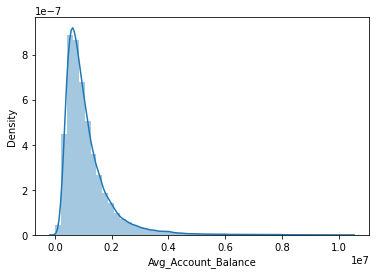

In [26]:
sns.distplot(full_data['Avg_Account_Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


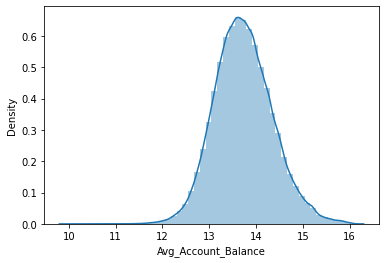

In [27]:
full_data['Avg_Account_Balance']=np.log(full_data['Avg_Account_Balance'])
sns.distplot(full_data['Avg_Account_Balance'])

In [28]:
full_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,3.583333,0,13.860193,0,0.0
1,IDD62UNG,0,30,RG277,Salaried,X1,2.666667,0,13.274205,0,0.0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,2.166667,0,14.210464,1,0.0
3,BF3NC7KV,1,34,RG270,Salaried,X1,1.583333,0,13.061453,0,0.0
4,TEASRWXV,0,30,RG282,Salaried,X1,2.750000,0,13.695360,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,RG268,Salaried,X2,7.166667,1,15.260677,1,NaN
105308,CWQ72DWS,1,55,RG277,Other,X2,7.166667,1,13.963200,0,NaN
105309,HDESC8GU,1,35,RG254,Salaried,X4,1.250000,0,14.348329,0,NaN
105310,2PW4SFCA,1,53,RG254,Other,X3,7.750000,0,13.510585,1,NaN


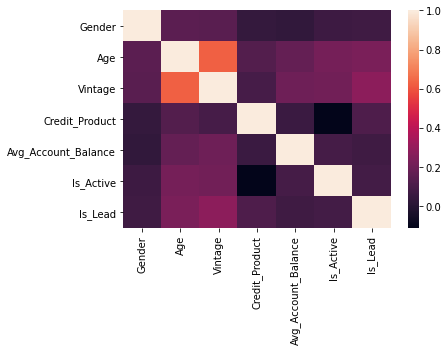

In [29]:
sns.heatmap(full_data.corr())

In [30]:
full_data['CreditProduct_for_OccupationAndRegion'] = full_data.groupby(['Occupation','Region_Code'])['Credit_Product'].transform('sum')

In [31]:
full_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_for_OccupationAndRegion
0,NNVBBKZB,0,73,RG268,Other,X3,3.583333,0,13.860193,0,0.0,5930
1,IDD62UNG,0,30,RG277,Salaried,X1,2.666667,0,13.274205,0,0.0,1141
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,2.166667,0,14.210464,1,0.0,9078
3,BF3NC7KV,1,34,RG270,Salaried,X1,1.583333,0,13.061453,0,0.0,804
4,TEASRWXV,0,30,RG282,Salaried,X1,2.750000,0,13.695360,0,0.0,542
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,RG268,Salaried,X2,7.166667,1,15.260677,1,NaN,2042
105308,CWQ72DWS,1,55,RG277,Other,X2,7.166667,1,13.963200,0,NaN,1249
105309,HDESC8GU,1,35,RG254,Salaried,X4,1.250000,0,14.348329,0,NaN,2122
105310,2PW4SFCA,1,53,RG254,Other,X3,7.750000,0,13.510585,1,NaN,2976


In [32]:
train.shape[0]

245725

In [33]:
full_data[train.shape[0]:]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_for_OccupationAndRegion
0,VBENBARO,1,29,RG254,Other,X1,2.083333,1,13.517598,0,NaN,2976
1,CCMEWNKY,1,43,RG268,Other,X2,4.083333,0,13.738129,0,NaN,5930
2,VK3KGA9M,1,31,RG270,Salaried,X1,1.166667,0,12.282798,0,NaN,804
3,TT8RPZVC,1,29,RG272,Other,X1,2.750000,0,13.674028,0,NaN,616
4,SHQZEYTZ,0,29,RG270,Other,X1,1.583333,0,13.395572,0,NaN,562
...,...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,RG268,Salaried,X2,7.166667,1,15.260677,1,NaN,2042
105308,CWQ72DWS,1,55,RG277,Other,X2,7.166667,1,13.963200,0,NaN,1249
105309,HDESC8GU,1,35,RG254,Salaried,X4,1.250000,0,14.348329,0,NaN,2122
105310,2PW4SFCA,1,53,RG254,Other,X3,7.750000,0,13.510585,1,NaN,2976


**Data Encoding**

In [34]:
# Importing Library
from sklearn.preprocessing import *
onehot_encoder = OneHotEncoder()

In [35]:
def data_encoding(data,cols):

  df = data.copy()

  for i in enumerate(cols):
     
    #reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
    codes = onehot_encoder.fit_transform(data[i[1]].values.reshape(-1,1)).toarray()

    #To add this back into the original dataframe 
    dfOneHot = pd.DataFrame(codes, columns = [i[1]+"_"+str(z) for z in range(len(data[i[1]].value_counts()))])

    data.reset_index(drop=True, inplace=True)
    dfOneHot.reset_index(drop=True, inplace=True)
    
    

    df = pd.concat([df, dfOneHot], axis=1)
    
        
  #droping the country column 
  df= df.drop(cols, axis=1)
  

  return df

In [37]:
full_data = data_encoding(full_data,cols=['Channel_Code','Occupation','Region_Code'])

In [38]:
full_data

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,NNVBBKZB,0,73,3.583333,0,13.860193,0,0.0,5930,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IDD62UNG,0,30,2.666667,0,13.274205,0,0.0,1141,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HD3DSEMC,0,56,2.166667,0,14.210464,1,0.0,9078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BF3NC7KV,1,34,1.583333,0,13.061453,0,0.0,804,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEASRWXV,0,30,2.750000,0,13.695360,0,0.0,542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,1,52,7.166667,1,15.260677,1,NaN,2042,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351033,CWQ72DWS,1,55,7.166667,1,13.963200,0,NaN,1249,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351034,HDESC8GU,1,35,1.250000,0,14.348329,0,NaN,2122,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351035,2PW4SFCA,1,53,7.750000,0,13.510585,1,NaN,2976,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Getting back Train and Test after Preprocessing :
train_data = full_data[0: train.shape[0]]
test_data = full_data[train.shape[0]:].drop(['Is_Lead'],axis=1)

In [40]:
train_data.head()

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,NNVBBKZB,0,73,3.583333,0,13.860193,0,0.0,5930,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IDD62UNG,0,30,2.666667,0,13.274205,0,0.0,1141,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HD3DSEMC,0,56,2.166667,0,14.210464,1,0.0,9078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BF3NC7KV,1,34,1.583333,0,13.061453,0,0.0,804,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TEASRWXV,0,30,2.750000,0,13.695360,0,0.0,542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
test_data.head()

,ID,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
245725,VBENBARO,1,29,2.083333,1,13.517598,0,2976,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245726,CCMEWNKY,1,43,4.083333,0,13.738129,0,5930,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245727,VK3KGA9M,1,31,1.166667,0,12.282798,0,804,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245728,TT8RPZVC,1,29,2.750000,0,13.674028,0,616,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245729,SHQZEYTZ,0,29,1.583333,0,13.395572,0,562,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Split the Train data into predictors and target :
X_train = train_data.drop(['ID','Is_Lead'],axis=1)
y_train = train_data['Is_Lead']
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,0,73,3.583333,0,13.860193,0,5930,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,30,2.666667,0,13.274205,0,1141,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,56,2.166667,0,14.210464,1,9078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,34,1.583333,0,13.061453,0,804,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,30,2.750000,0,13.695360,0,542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X_test = test_data.drop(['ID'],axis=1)
X_test.reset_index(drop=True)

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,1,29,2.083333,1,13.517598,0,2976,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,43,4.083333,0,13.738129,0,5930,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,31,1.166667,0,12.282798,0,804,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,29,2.750000,0,13.674028,0,616,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,29,1.583333,0,13.395572,0,562,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1,52,7.166667,1,15.260677,1,2042,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105308,1,55,7.166667,1,13.963200,0,1249,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105309,1,35,1.250000,0,14.348329,0,2122,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105310,1,53,7.750000,0,13.510585,1,2976,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Performing Over Sampling for Imbalanced dataset**

In [44]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [47]:
ros = RandomOverSampler(sampling_strategy=0.8)
X_train_sampled, y_train_sampled = ros.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
X_train_sampled = pd.DataFrame(X_train_sampled, columns=X_train.columns)

In [49]:
X_train_sampled.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,0.0,73.0,3.583333,0.0,13.860193,0.0,5930.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,30.0,2.666667,0.0,13.274205,0.0,1141.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,56.0,2.166667,0.0,14.210464,1.0,9078.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,34.0,1.583333,0.0,13.061453,0.0,804.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,30.0,2.750000,0.0,13.695360,0.0,542.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
y_train_sampled = pd.DataFrame(y_train_sampled, columns=['Is_Lead'])

TypeError: ignored

In [51]:
y_train_sampled

,Is_Lead
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
337381,1.0
337382,1.0
337383,1.0
337384,1.0


In [52]:
y_train_sampled.value_counts()

Is_Lead
0.0        187437
1.0        149949
dtype: int64

In [61]:
def data_scaling(data , cols ):
  data[cols] = MinMaxScaler().fit_transform(data[cols])
  return data

X_train_scaled = data_scaling( X_train_sampled , X_train_sampled.columns )
X_test_scaled = data_scaling( X_test, X_test.columns )

In [62]:
X_train_scaled.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
0,0.0,0.806452,0.281250,0.0,0.630865,0.0,0.653151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.112903,0.195312,0.0,0.536510,0.0,0.125496,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.532258,0.148438,0.0,0.687265,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.177419,0.093750,0.0,0.502253,0.0,0.088365,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.112903,0.203125,0.0,0.604324,0.0,0.059498,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
X_test_scaled

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,CreditProduct_for_OccupationAndRegion,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,Region_Code_10,Region_Code_11,Region_Code_12,Region_Code_13,Region_Code_14,Region_Code_15,Region_Code_16,Region_Code_17,Region_Code_18,Region_Code_19,Region_Code_20,Region_Code_21,Region_Code_22,Region_Code_23,Region_Code_24,Region_Code_25,Region_Code_26,Region_Code_27,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_31,Region_Code_32,Region_Code_33,Region_Code_34
245725,1.0,0.081967,0.140625,1.0,0.574028,0.0,0.327603,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245726,1.0,0.311475,0.328125,0.0,0.610280,0.0,0.653113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245727,1.0,0.114754,0.054688,0.0,0.371049,0.0,0.088264,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245728,1.0,0.081967,0.203125,0.0,0.599743,0.0,0.067548,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
245729,0.0,0.081967,0.093750,0.0,0.553969,0.0,0.061598,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,1.0,0.459016,0.617188,1.0,0.860560,1.0,0.224683,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351033,1.0,0.508197,0.617188,1.0,0.647278,0.0,0.137300,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351034,1.0,0.180328,0.062500,0.0,0.710586,0.0,0.233499,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
351035,1.0,0.475410,0.671875,0.0,0.572876,1.0,0.327603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Boosting Algorithm Libraries :
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Model Evaluation Metric & Cross Validation Libraries :
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, train_test_split

In [82]:
!rm -r /opt/conda/lib/python3.6/site-packages/lightgbm
!git clone --recursive https://github.com/Microsoft/LightGBM

rm: cannot remove '/opt/conda/lib/python3.6/site-packages/lightgbm': No such file or directory
Cloning into 'LightGBM'...
remote: Enumerating objects: 22185, done.
remote: Counting objects: 100% (731/731), done.
remote: Compressing objects: 100% (395/395), done.
remote: Total 22185 (delta 452), reused 512 (delta 324), pack-reused 21454
Receiving objects: 100% (22185/22185), 17.53 MiB | 25.04 MiB/s, done.
Resolving deltas: 100% (16162/16162), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/build/LightGBM/external_libs/compute'...
re

In [83]:
!apt-get install -y -qq libboost-all-dev

In [66]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd LightGBM
!mkdir build
%cd build
!cmake ../../LightGBM
!make -j4

Cloning into 'LightGBM'...
remote: Enumerating objects: 22185, done.
remote: Counting objects: 100% (933/933), done.
remote: Compressing objects: 100% (555/555), done.
remote: Total 22185 (delta 584), reused 602 (delta 360), pack-reused 21252
Receiving objects: 100% (22185/22185), 17.48 MiB | 4.97 MiB/s, done.
Resolving deltas: 100% (16150/16150), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 

In [67]:
!cd LightGBM/python-package/;python3 setup.py install --precompile

/bin/bash: line 0: cd: LightGBM/python-package/: No such file or directory
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [76]:
y_train_sampled.values.ravel()

array([0., 0., 0., ..., 1., 1., 1.])

In [90]:
kf=KFold(n_splits=10,shuffle=True)

preds_1   = list()
y_pred_1  = []
rocauc_score = []

for i,(train_idx,val_idx) in enumerate(kf.split(X_train_scaled)):    
    
    X_train, y_train = X_train_scaled.iloc[train_idx,:], np.ravel(y_train_sampled.iloc[train_idx])
    X_val, y_val = X_train_scaled.iloc[val_idx, :],np.ravel(y_train_sampled.iloc[val_idx])
   
    print('\nFold: {}\n'.format(i+1))

    xg=XGBClassifier( eval_metric='auc',
        
                     # GPU PARAMETERS #
                     tree_method='gpu_hist', 
                     gpu_id=0,
                     # GPU PARAMETERS #
        
                     random_state=294,
                     learning_rate=0.15, 
                     max_depth=4,
                     n_estimators=494, 
                     objective='binary:logistic'
                    )

    xg.fit(X_train, y_train
           ,eval_set=[(X_train, y_train),(X_val, y_val)]
           ,early_stopping_rounds=100
           ,verbose=100
           )

    roc_auc = roc_auc_score(y_val,xg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds_1.append(xg.predict_proba(X_test_scaled[X_test_scaled.columns])[:, 1])
    
y_pred_final_1 = np.mean(preds_1,axis=0)    
sub['Is_Lead']=y_pred_final_1

print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

# Download and Show Submission File :

display("sample_submmission",sub)
sub.head(5)


Fold: 1

[0]	validation_0-auc:0.75257	validation_1-auc:0.749769
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.79311	validation_1-auc:0.788744
[200]	validation_0-auc:0.798059	validation_1-auc:0.791632
[300]	validation_0-auc:0.801578	validation_1-auc:0.793375
[400]	validation_0-auc:0.804852	validation_1-auc:0.794936
[493]	validation_0-auc:0.807606	validation_1-auc:0.795923

Fold: 2

[0]	validation_0-auc:0.753104	validation_1-auc:0.750017
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.793145	validation_1-auc:0.7872
[200]	validation_0-auc:0.79816	validation_1-auc:0.790345
[300]	validation_0-auc:0.80189	validation_1-auc:0.792418
[400]	validation_0-auc:0.805172	validation_1-auc:0.794239
[493]	validation_0-auc:0.807774	vali

'sample_submmission'

,ID,Is_Lead,Response
0,VBENBARO,0.072205,0.073550
1,CCMEWNKY,0.450428,0.458415
2,VK3KGA9M,0.163468,0.162907
3,TT8RPZVC,0.062806,0.063930
4,SHQZEYTZ,0.057002,0.057221
...,...,...,...
105307,DBENJOYI,0.997496,0.997194
105308,CWQ72DWS,0.800648,0.805266
105309,HDESC8GU,0.733764,0.745809
105310,2PW4SFCA,0.712319,0.709443


,ID,Is_Lead,Response
0,VBENBARO,0.072205,0.073550
1,CCMEWNKY,0.450428,0.458415
2,VK3KGA9M,0.163468,0.162907
3,TT8RPZVC,0.062806,0.063930
4,SHQZEYTZ,0.057002,0.057221


In [91]:
sub_file_name_1 = "XGB_Submission.csv"

In [92]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [94]:
sub.to_csv(sub_file_name_1,index=False)
!cp XGB_Submission.csv "drive/My Drive/"